# Restriction Dataset Cleaning And Sentiment Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/My Drive/Disseration/restriction_tweets')
folder = os.path.join('/content/drive/My Drive/Disseration/restriction_tweets')
!ls

Mounted at /content/drive
model1.h5  restriction_tweets.ipynb  rnn_model.hdf5


## 1.Importing all the library

### 1.1 large installment

In [2]:
 !python3 -c "import nltk; nltk.download('all')"

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [3]:
pip install emojis

In [4]:
pip install dash


     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 1.0MB 17.6MB/s 
     |████████████████████████████████| 3.5MB 50.4MB/s 
     |████████████████████████████████| 92kB 13.2MB/s 
     |████████████████████████████████| 1.8MB 52.4MB/s 
     |████████████████████████████████| 358kB 53.4MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85834 sha256=96706ef8a147e5be0608782d481ca3e7a37f1e99fa7f68797fa3a5e4cab56c56
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014875 sha256=14022bf80ea91b8d4f43eb6db3fc66616780ee76cb1481dae5e40084e584a707
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540993 sha256=718cd76ecb35f8a1d2c07

In [5]:
pip install jupyter_dash

### 1.2 Importing the libraries required

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
import string
import re
%matplotlib inline
import emojis
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer

import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM,SpatialDropout1D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Visualisation imports
import plotly.express as px
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import io
from base64 import b64encode
import missingno as ms
import matplotlib.pyplot as plt
import plotly.express as px



### 1.3 importing the Dataset

In [7]:
df_restriction = pd.read_csv("https://raw.githubusercontent.com/FabioPalliparambil98/COVID-19_Restriction_Tweets/main/combined_restrictiontweets.csv")
df_restriction.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,nzorach,"city planner, finance nerd, carpenter, journal...",Cuba of the North,4160,1682,33161,24/05/2011 17:34,26/03/2021 17:55,0,Really great to hear from @ddisparte on supply...,[]
1,earthstar44,Non-denominational Christian Study ancient te...,cheshire,676,483,52458,06/10/2010 14:34,26/03/2021 17:52,36,RT @21WIRE: #Lockdown One Year On: Govt's and ...,"[{'text': 'Lockdown', 'indices': [12, 21]}]"
2,GerischMrs,Mrs. Gerisch - Student Assistance Counselor at...,NaN,52,19,1752,08/09/2020 23:51,26/03/2021 17:51,9,RT @ndvh: While social distancing is recommend...,[]
3,Pran53173719,Growing old is mandatory. Growing up is option...,India,73,74,3920,19/02/2017 13:25,26/03/2021 17:51,0,#COVID19 Government has made an advisory of us...,"[{'text': 'COVID19', 'indices': [0, 8]}]"
4,JWALKER65,"Yeah. well, there is that.....",DETROIT-ish,537,75,9142,06/10/2009 18:08,26/03/2021 17:50,3,RT @Adamant4Detroit: #covid19 is not going awa...,"[{'text': 'covid19', 'indices': [21, 29]}]"


## 2.Data Pre-Processing

### 2.1 Removing NaN

In [8]:
print('Display the NaN values in the DataSet')
df_restriction.isnull().sum()

Display the NaN values in the DataSet


username              0
acctdesc          18136
location          51385
following             0
followers             0
totaltweets           0
usercreatedts         0
tweetcreatedts        0
retweetcount          0
text                  0
hashtags              0
dtype: int64

In [9]:
print("Before the NaN value is removed")
print(df_restriction.shape)
print('')
df_restriction = df_restriction.dropna()

print("After the NaN values is removed")
print(df_restriction.shape)

Before the NaN value is removed
(190395, 11)

After the NaN values is removed
(132635, 11)


In [10]:
print('result after removing the NaN in the DataSet')
df_restriction.isnull().sum()

result after removing the NaN in the DataSet


username          0
acctdesc          0
location          0
following         0
followers         0
totaltweets       0
usercreatedts     0
tweetcreatedts    0
retweetcount      0
text              0
hashtags          0
dtype: int64

### 2.2 Dropping Duplicates

In [11]:
print('After dropping duplicates')
print(df_restriction.shape,"\n")

df_restriction = df_restriction.drop_duplicates()

print('After dropping duplicates')
print(df_restriction.shape)

After dropping duplicates
(132635, 11) 

After dropping duplicates
(41529, 11)


### 2.3 Object to Datetime

In [12]:
df_restriction['tweetcreatedts'] = pd.to_datetime(df_restriction['tweetcreatedts'])
df_restriction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41529 entries, 0 to 190394
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   username        41529 non-null  object        
 1   acctdesc        41529 non-null  object        
 2   location        41529 non-null  object        
 3   following       41529 non-null  int64         
 4   followers       41529 non-null  int64         
 5   totaltweets     41529 non-null  int64         
 6   usercreatedts   41529 non-null  object        
 7   tweetcreatedts  41529 non-null  datetime64[ns]
 8   retweetcount    41529 non-null  int64         
 9   text            41529 non-null  object        
 10  hashtags        41529 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 3.8+ MB


### 2.4 resetting the index for pandas dataframe

In [13]:
# resetting the index available
df_restriction.reset_index(drop=True, inplace=True)

### 2.5 Extracting Day, Hour, Month and Date
- https://pythontic.com/datetime/datetime/weekday 

In [14]:
df_restriction['Month'] = df_restriction.tweetcreatedts.dt.month
df_restriction['Hour'] = df_restriction.tweetcreatedts.dt.hour
df_restriction['day_in_week'] = df_restriction.tweetcreatedts.dt.weekday
df_restriction['day'] = df_restriction.tweetcreatedts.dt.day

In [15]:
print('before changing numeric to characters')
print(df_restriction.day_in_week.unique())
print("\n")

df_restriction['day_in_week'].replace(0, 'Monday',inplace=True)
df_restriction['day_in_week'].replace(1, 'Tuesday',inplace=True)
df_restriction['day_in_week'].replace(2, 'Wednesday',inplace=True)
df_restriction['day_in_week'].replace(3, 'Thursday',inplace=True)
df_restriction['day_in_week'].replace(4, 'Friday',inplace=True)
df_restriction['day_in_week'].replace(5, 'Saturday',inplace=True)
df_restriction['day_in_week'].replace(6, 'Sunday',inplace=True)

print('After changing numeric to characters')
print(df_restriction.day_in_week.unique())

before changing numeric to characters
[4 3 2 1 5 6 0]


After changing numeric to characters
['Friday' 'Thursday' 'Wednesday' 'Tuesday' 'Saturday' 'Sunday' 'Monday']


## 3.Sentiment Analysis Data Preparation 

### 3.1 Cleaning the Text

In [16]:
def clean_data(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    # text = re.sub('[0-9]+', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = emojis.decode(text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'_', '', text)
    text = re.sub(r'[0-9]', '', text)
    text = re.sub('@[^\s]+', '', text)
    text = re.sub(r'[^\w\s]',' ', text)
    text = text.lower()
    return text

df_restriction['text'] = df_restriction['text'].apply(lambda x: clean_data(x))

df_restriction['location'] = df_restriction['location'].apply(lambda x: clean_data(x))

df_restriction.head(1)



,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,Month,Hour,day_in_week,day
0,nzorach,"city planner, finance nerd, carpenter, journal...",cuba of the north,4160,1682,33161,24/05/2011 17:34,2021-03-26 17:55:00,0,really great to hear from ddisparte on supply ...,[],3,17,Friday,26


### 3.2 Words Lemmatizer 

In [17]:
wn = nltk.WordNetLemmatizer()

df_restriction['text'] = df_restriction['text'].apply(lambda x: wn.lemmatize(x))

### 3.4 Tokenizing the words 

In [18]:
maximum_words = 1000
maximum_length = 100

tokenizer = Tokenizer(num_words=maximum_words, split=' ')
tokenizer.fit_on_texts(df_restriction['text'].values)
X = tokenizer.texts_to_sequences(df_restriction['text'].values)

### 3.5 Padding the Tokenized sequence

In [19]:
X_padded = pad_sequences(X)

In [20]:
X_padded

array([[  0,   0,   0, ...,   2,  49,   1],
       [  0,   0,   0, ..., 646,   4, 550],
       [  0,   0,   0, ...,  32, 833,  51],
       ...,
       [  0,   0,   0, ...,  45,  82, 134],
       [  0,   0,   0, ..., 387, 384, 424],
       [  0,   0,   0, ...,  91, 458,  80]], dtype=int32)

### 3.6 Model Prediction

In [21]:
from keras.models import load_model
model = load_model('rnn_model.hdf5')

In [22]:
predictions = model.predict(X_padded)
predictions

array([[0.26375008],
       [0.86508185],
       [0.16218843],
       ...,
       [0.47178644],
       [0.4742901 ],
       [0.5029408 ]], dtype=float32)

In [23]:
results = []

for i in predictions:    
  predicted_classes = np.argmax(i)
  if predicted_classes < 0.5:
    results.append(predicted_classes)
  else:
    results.append(predicted_classes)
  predicted_classes

In [24]:
df_restriction['sentiment'] = results

In [25]:
df_restriction.head(5)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,Month,Hour,day_in_week,day,sentiment
0,nzorach,"city planner, finance nerd, carpenter, journal...",cuba of the north,4160,1682,33161,24/05/2011 17:34,2021-03-26 17:55:00,0,really great to hear from ddisparte on supply ...,[],3,17,Friday,26,0
1,earthstar44,Non-denominational Christian Study ancient te...,cheshire,676,483,52458,06/10/2010 14:34,2021-03-26 17:52:00,36,wire lockdown one year on govts and their cote...,"[{'text': 'Lockdown', 'indices': [12, 21]}]",3,17,Friday,26,0
2,Pran53173719,Growing old is mandatory. Growing up is option...,india,73,74,3920,19/02/2017 13:25,2021-03-26 17:51:00,0,covid government has made an advisory of using...,"[{'text': 'COVID19', 'indices': [0, 8]}]",3,17,Friday,26,0
3,JWALKER65,"Yeah. well, there is that.....",detroitish,537,75,9142,06/10/2009 18:08,2021-03-26 17:50:00,3,adamantdetroit covid is not going away without...,"[{'text': 'covid19', 'indices': [21, 29]}]",3,17,Friday,26,0
4,MPulseSoftware,MPulse Software Means Maintenance Success,eugene or,765,393,755,13/02/2013 19:29,2021-03-26 17:50:00,0,before the pandemic personal work areas were s...,[],3,17,Friday,26,0


## 4.Visualisations

### 4.1 word cloud Visualisation

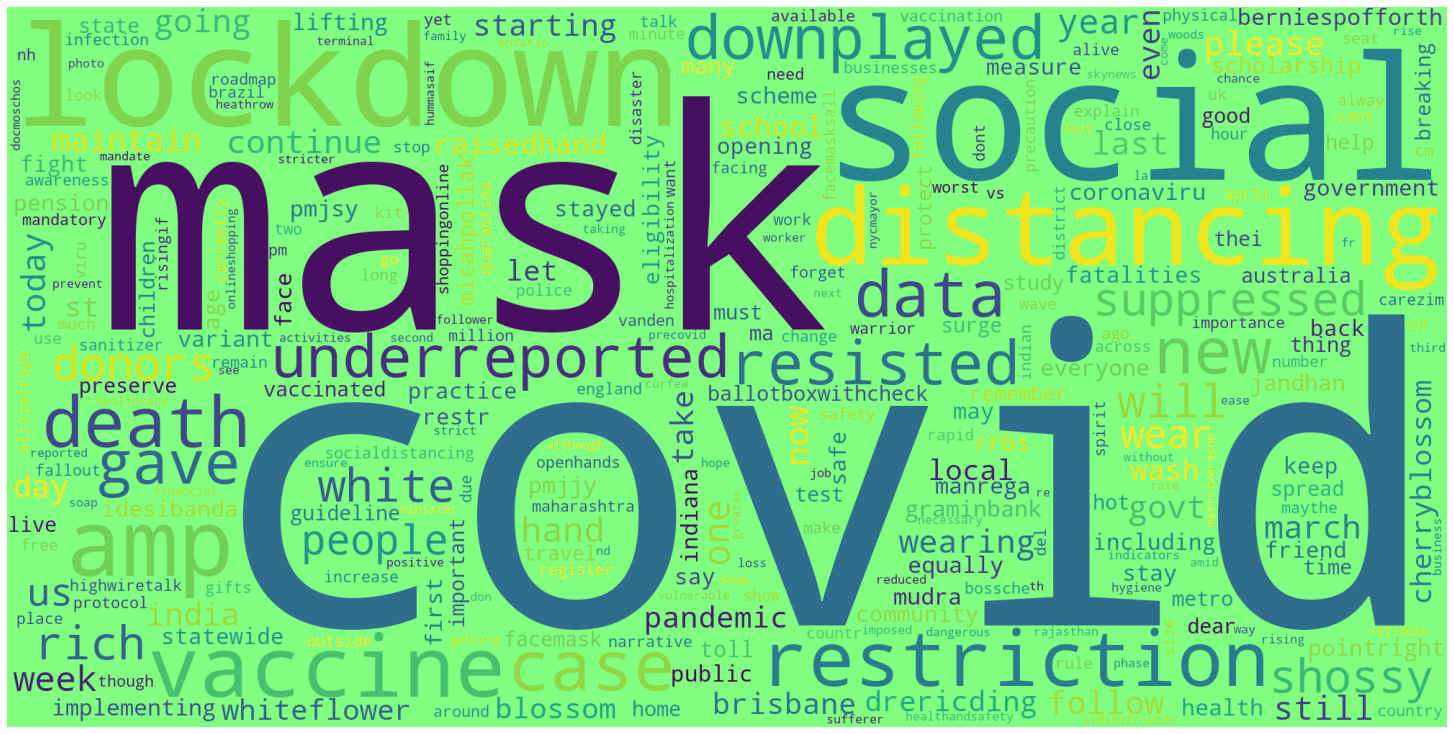

In [26]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="#80ff80", max_words=300, width=2000, height=1000, collocations=False).generate(" ".join(df_restriction[df_restriction.sentiment == 0].text))

plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### 4.3 Bar Chart
retween and hour visualisation


In [ ]:


days = df_restriction.day_in_week.unique()
buffer = io.StringIO()

html_bytes = buffer.getvalue().encode()
encoded = b64encode(html_bytes).decode()


colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

# Build App
app = JupyterDash(__name__)

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Bar Chart',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(children='Finding wether there is a relation between speed and the Accident Severity', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    
     html.Div(
        [
            dcc.Dropdown(
                id="dropdown",
                options=[{"label": x, "value": x} for x in days],
                value=days[0],
                clearable=False),
        ],
         style={'width': '25%',
               'display': 'inline-block', 'borderRadius':5,
        'padding':10, 'width':300}),

    dcc.Graph(
        id='graph'
    )
])

@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])

def update_bar_chart(days):
    mask = df_restriction["day_in_week"] == days
    fig = px.bar(df_restriction[mask], x="Hour", y="retweetcount", barmode="overlay")
    fig.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text'],
        width=1800, height=800, bargap=0.05)
    
    return fig

app.run_server(debug=True)

### 4.4 Barchart using Dash and Dropdown


In [ ]:


days = df_restriction.sentiment.unique()
buffer = io.StringIO()

html_bytes = buffer.getvalue().encode()
encoded = b64encode(html_bytes).decode()


colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

# Build App
app = JupyterDash(__name__)

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Bar Chart',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

    html.Div(children='Finding wether there is a relation between speed and the Accident Severity', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    
     html.Div(
        [
            dcc.Dropdown(
                id="dropdown",
                options=[{"label": x, "value": x} for x in days],
                value=days[0],
                clearable=False),
        ],
         style={'width': '25%',
               'display': 'inline-block', 'borderRadius':5,
        'padding':10, 'width':300}),

    dcc.Graph(
        id='graph'
    )
])

@app.callback(
    Output("graph", "figure"), 
    [Input("dropdown", "value")])

def update_bar_chart(days):
    mask = df_restriction["sentiment"] == days
    fig = px.bar(df_restriction[mask], x="day_in_week", y="retweetcount", barmode="overlay")
    fig.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text'],
        width=1800, height=800, bargap=0.05)
    
    return fig

app.run_server(debug=True)

### 4.5 Scatter Line Chart


In [27]:
import plotly.graph_objects as go

scatter_line_vaccination = go.Figure(data=go.Scatter(
    x=df_restriction['location'].unique(),
    y=df_restriction['retweetcount'],
    mode='lines+markers',
    name='lines+markers',
    marker_color='rgba(255, 182, 193, .9)'
    # mode='markers'
))
scatter_line_vaccination.show()